# Titanic

Objective: Predict if the passenger survives or does not, based on the other given information

Supervised learning, classification model

## Package Loading

In [311]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.signal import correlate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

## Data Loading

In [236]:
# train
df_train = pd.read_csv('train.csv')
df = df_train.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [237]:
df_test = pd.read_csv("test.csv")
df2 = df_test.copy()
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Cleaning

In [238]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [239]:
df2.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [240]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


In [241]:
df3 = missing_data[missing_data['Percent'] > 0.4]
to_drop = df3.index.tolist()
df3 = df.drop(to_drop, axis=1, inplace=True)

In [242]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000


In [243]:
# missing data
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000


In [244]:
df3 = missing_data[missing_data['Percent'] > 0.4]
to_drop = df3.index.tolist()
df3 = df2.drop(to_drop, axis=1, inplace=True)

In [245]:
# missing data
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000


In [246]:
#replace NaNs with 0, or something 
df.Age = df.Age.replace(np.nan, df.Age.mean())

In [247]:
df2.Age = df2.Age.replace(np.nan, df2.Age.mean())

In [248]:
df2.Fare = df2.Fare.replace(np.nan, df2.Fare.mean())

In [249]:
df.Embarked = df.Embarked.fillna(method='ffill')

In [250]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [271]:
# missing data
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [272]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [252]:
df.Age = df.Age.astype(int)

In [273]:
df2.Age = df2.Age.astype(int)

In [253]:
df.Sex = LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,S


In [274]:
df2.Sex = LabelEncoder().fit_transform(df2.Sex)

In [254]:
df = df.drop(['Name','Ticket'],axis=1)

In [275]:
df2 = df2.drop(['Name','Ticket'],axis=1)

In [255]:
df.Embarked = LabelEncoder().fit_transform(df.Embarked)
#df = df.rename(columns={"PassengerId": "Id", "Pclass": "Class", "Parch":"ParCh"})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


In [276]:
df2.Embarked = LabelEncoder().fit_transform(df2.Embarked)
#df = df.rename(columns={"PassengerId": "Id", "Pclass": "Class", "Parch":"ParCh"})
df2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34,0,0,7.8292,1
1,893,3,0,47,1,0,7.0000,2
2,894,2,1,62,0,0,9.6875,1
3,895,3,1,27,0,0,8.6625,2
4,896,3,0,22,1,1,12.2875,2


## Data Exploration

In [256]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [257]:
corr_matrix = df.corr().abs()
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.005007,0.035144,0.042939,0.033741,0.057527,0.001652,0.012658,0.015216
Survived,0.005007,1.000000,0.338481,0.543351,0.067809,0.035322,0.081629,0.257307,0.172726
Pclass,0.035144,0.338481,1.000000,0.131900,0.335071,0.083081,0.018443,0.549500,0.168430
Sex,0.042939,0.543351,0.131900,1.000000,0.082533,0.114631,0.245489,0.182333,0.113807
Age,0.033741,0.067809,0.335071,0.082533,1.000000,0.232743,0.176744,0.093856,0.028257
SibSp,0.057527,0.035322,0.083081,0.114631,0.232743,1.000000,0.414838,0.159651,0.070111
Parch,0.001652,0.081629,0.018443,0.245489,0.176744,0.414838,1.000000,0.216225,0.041732
Fare,0.012658,0.257307,0.549500,0.182333,0.093856,0.159651,0.216225,1.000000,0.228364
Embarked,0.015216,0.172726,0.168430,0.113807,0.028257,0.070111,0.041732,0.228364,1.000000


C:\Users\stace\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Survived', ylabel='Density'>

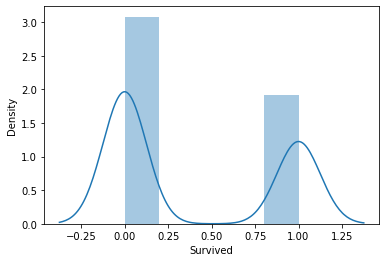

In [258]:
sns.distplot(df.Survived)

C:\Users\stace\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

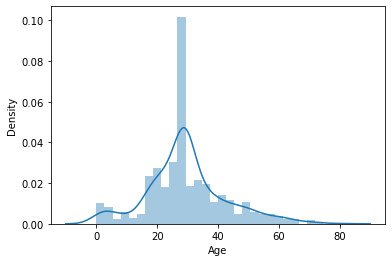

In [259]:
sns.distplot(df.Age)

C:\Users\stace\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sex', ylabel='Density'>

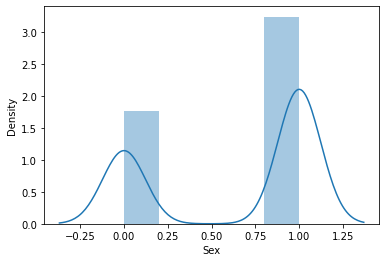

In [260]:
sns.distplot(df.Sex)

C:\Users\stace\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Pclass', ylabel='Density'>

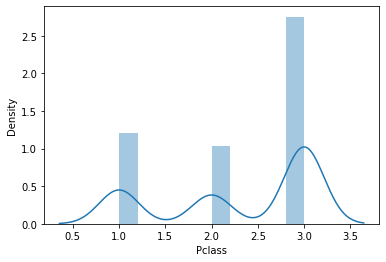

In [261]:
sns.distplot(df.Pclass)

C:\Users\stace\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Embarked', ylabel='Density'>

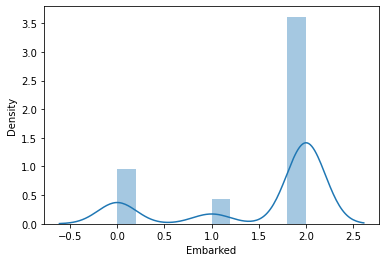

In [262]:
sns.distplot(df.Embarked)

C:\Users\stace\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SibSp', ylabel='Density'>

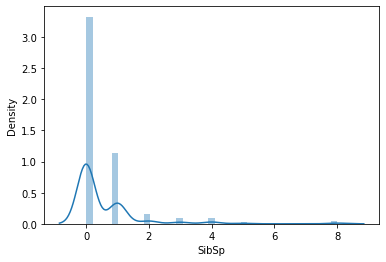

In [263]:
sns.distplot(df.SibSp)

C:\Users\stace\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Parch', ylabel='Density'>

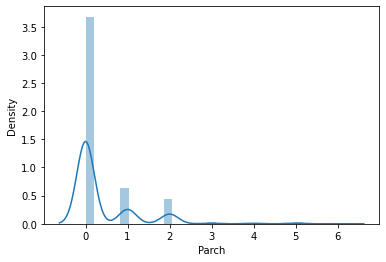

In [264]:
sns.distplot(df.Parch)

In [265]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Split Data 

In [277]:
X_train = df.drop('Survived',axis=1)

In [278]:
X_test = df2.copy()

In [279]:
y = df.Survived # Target

In [269]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Scale Data

In [280]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Baseline Model

In [284]:
GB = GaussianNB()
model = GaussianNB().fit(X_train, y)
y_pred = model.predict(X_test)

In [285]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Iterate Models

In [281]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y)
predictions = model.predict(X_test)

In [283]:
output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Going Forward...

In [291]:
# Set X & y
X = df.drop('Survived',axis=1)
y = df.Survived

In [292]:
# train and validate
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [293]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [294]:
# Baseline
GB = GaussianNB()
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [295]:
target_names = ['Did not survive', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Did not survive       0.85      0.80      0.83       168
       Survived       0.70      0.76      0.73       100

       accuracy                           0.79       268
      macro avg       0.77      0.78      0.78       268
   weighted avg       0.79      0.79      0.79       268



In [296]:
X_test = df2.copy()
X_test = scaler.transform(X_test)

predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': df2.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Next

In [297]:
# Set X & y
X = df.drop('Survived',axis=1)
y = df.Survived
# train and validate
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [299]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
target_names = ['Did not survive', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Did not survive       0.83      0.89      0.86       168
       Survived       0.78      0.69      0.73       100

       accuracy                           0.81       268
      macro avg       0.81      0.79      0.80       268
   weighted avg       0.81      0.81      0.81       268



In [301]:
k_folds=5

# Make a dictionary with model arguments as keys and lists of grid settings as values
param_grid = {
    'n_estimators': [1,25,50,100,125], 
    'max_depth': [1,2,5,8,10]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=k_folds, scoring='r2', verbose=1, n_jobs=-1) # verbose=1 -> print results, n_jobs=-1 -> use all processors in parallel
grid_result = grid.fit(X_train, y_train)

best_r2 = grid_result.best_score_
best_n_estimators = grid_result.best_params_['n_estimators']
best_max_depth = grid_result.best_params_['max_depth']
print(f'The best hyperparameter settings achieve a cross-validated R^2 of: {best_r2}\nn_estimators:\t{best_n_estimators}\nmax_depth:\t{best_max_depth}')

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 110 out of 125 | elapsed:    2.4s remaining:    0.2s


The best hyperparameter settings achieve a cross-validated R^2 of: 0.24298815219867853
n_estimators:	50
max_depth:	5


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.8s finished


In [314]:
grid.best_estimator_ 

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)

In [302]:
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
target_names = ['Did not survive', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

Did not survive       0.83      0.90      0.86       168
       Survived       0.80      0.68      0.74       100

       accuracy                           0.82       268
      macro avg       0.81      0.79      0.80       268
   weighted avg       0.82      0.82      0.81       268



In [306]:
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.8134328358208955
0.7873134328358209
[[146  28]
 [ 22  72]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       177
           1       0.67      0.74      0.70        91

    accuracy                           0.79       268
   macro avg       0.76      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [309]:
clf = LogisticRegression().fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       168
           1       0.73      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [310]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       168
           1       0.63      0.62      0.63       100

    accuracy                           0.72       268
   macro avg       0.70      0.70      0.70       268
weighted avg       0.72      0.72      0.72       268



In [312]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       168
           1       0.77      0.68      0.72       100

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



In [313]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       168
           1       0.77      0.72      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

0.8134328358208955


In [318]:
clf = GradientBoostingClassifier(random_state=0)
k_folds=5

# Make a dictionary with model arguments as keys and lists of grid settings as values
param_grid = {
    #'loss':['deviance', 'exponential'],
    'learning_rate':[0.1,0.5,1.0],
    'n_estimators':[50,100,500,1000],
    'max_depth':[5,10],
    #'max_features':['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=k_folds, scoring='r2', verbose=1, n_jobs=-1) 
grid_result = grid.fit(X_train, y_train)
grid.best_estimator_ 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   41.0s finished


GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=0)

In [319]:
clf = GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=0).fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print(clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       168
           1       0.77      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

0.8208955223880597
